# FCIM.M.IA - Artificial Intelligence

> **Lab 5:** Processing Images with OpenCV \\
> **Performed by:** Astafi Valentina, group TI-231M \\
> **Verified by:** Mihail Gavrilita, asist. univ.

## Imports and Utils

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

## Task 1 -- Write the following functions (A blurring function, A sharpening function using OpenCV. 

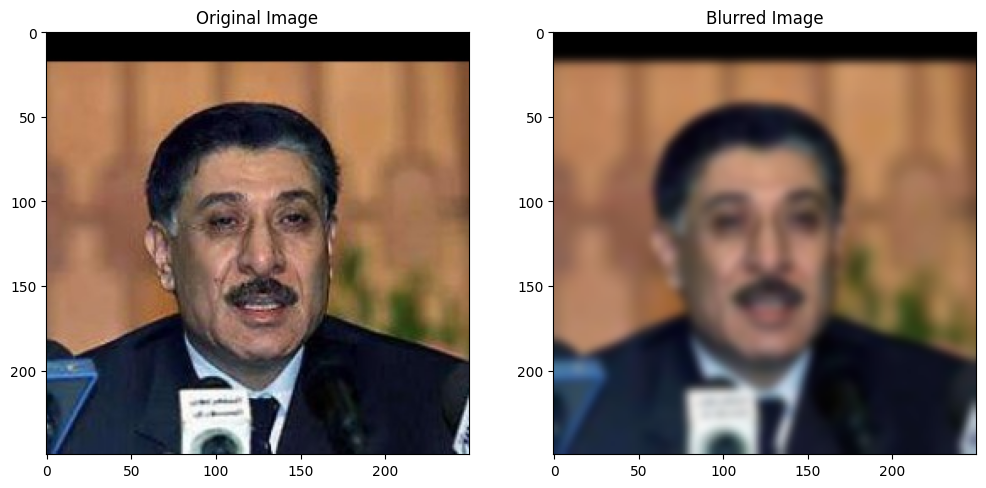

In [3]:
image_path = '/Users/astafivalentina/PycharmProjects/AILabs/5.OpenCV/test_images/33C8EE.jpg'

def blur_image(input_path, output_path=None, kernel_size=(3, 3), sigmaX=20):
    image = cv2.imread(input_path)

    blurred_image = cv2.GaussianBlur(image, kernel_size, sigmaX)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    plt.title('Blurred Image')

    plt.show()

    if output_path:
        cv2.imwrite(output_path, blurred_image)

blur_image(image_path, output_path='/Users/astafivalentina/PycharmProjects/AILabs/5.OpenCV/image_tasks/image_task_1_blurred.jpg', kernel_size=(15, 15), sigmaX=0)

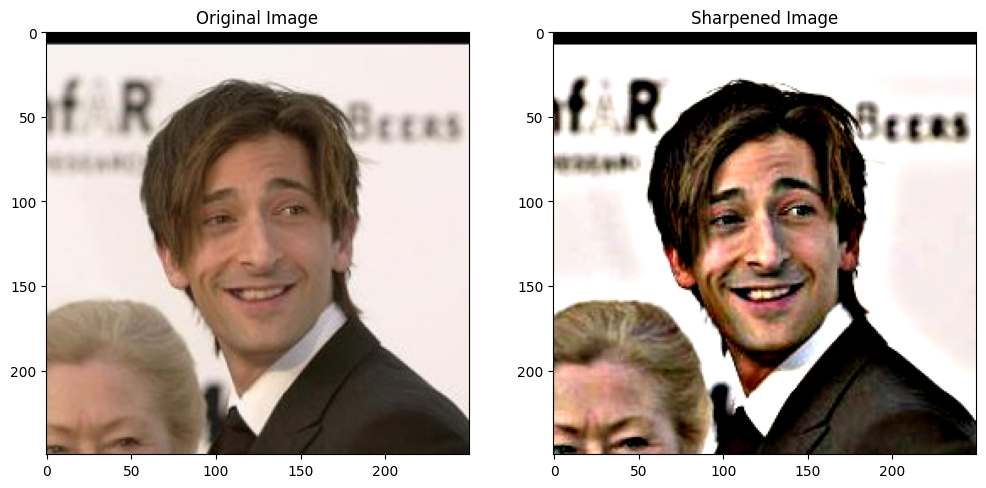

In [6]:
image_path = '/Users/astafivalentina/PycharmProjects/AILabs/5.OpenCV/test_images/4CA327.jpg'

def sharpen_image(input_path, output_path=None, strength=2.5):

    image = cv2.imread(input_path)
    blurred_image = cv2.GaussianBlur(image, (0, 0), 10)

    sharpened_image = cv2.addWeighted(image, 1.0 + strength, blurred_image, -strength, 0)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
    plt.title('Sharpened Image')

    plt.show()

    if output_path:
        cv2.imwrite(output_path, sharpened_image)

sharpen_image(image_path, output_path='/Users/astafivalentina/PycharmProjects/AILabs/5.OpenCV/image_tasks/image_task_1_sharpened.jpg', strength=2.0)

## Task 2 -- Implement a face detection system using OpenCV. 

In [ ]:
# Your work here

## Task 3 -- Implement a system that detects if a photo is accepted for passport or not, by using OpenCV. 

## Conclusions:

*Your conclusions go here*

## Bibliography:

[1] Sharpening An Image using OpenCV Library in Python. Available: https://www.analyticsvidhya.com/blog/2021/08/sharpening-an-image-using-opencv-library-in-python/
[2] Image Processing in OpenCV. Available: https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html
[3] Smoothing Images. Available: https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
[4]
[5]